<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/hora_max_min_plot25d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ingrese el símbolo del instrumento o activo (por ejemplo, EURUSD=X): 
[*********************100%%**********************]  1 of 1 completed


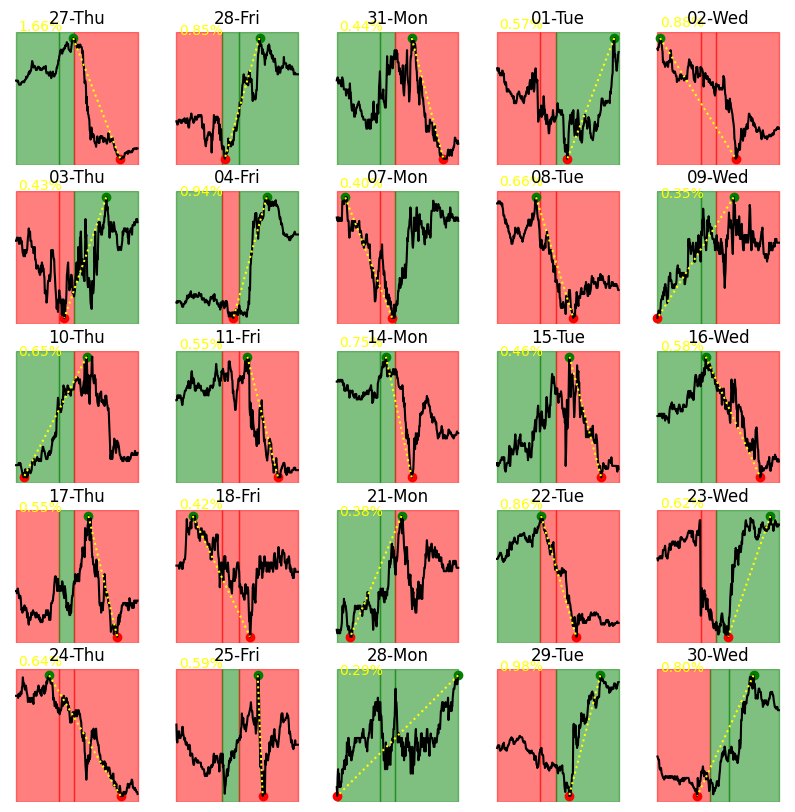

In [11]:
import yfinance as yf
import pandas as pd
from pylab import *
import statistics as stat

# Solicitar el instrumento o activo al usuario
activo = input("Ingrese el símbolo del instrumento o activo (por ejemplo, EURUSD=X): ") or "EURUSD=X"
# activo="EURUSD=X"

# Descargar y formatear los datos
datos = pd.DataFrame(yf.download(activo, period="25d", interval="5m").Close)
datos.index = pd.to_datetime(datos.index).strftime("%Y-%m-%d %H:%M")
datos["time"] = pd.to_datetime(datos.index).strftime("%H:%M")
datos.index = pd.to_datetime(datos.index).strftime("%Y-%m-%d")

# Convertir el índice a un DatetimeIndex
datos.index = pd.DatetimeIndex(datos.index)

# Filtrar los datos para eliminar los días sábados y domingos
datos = datos[datos.index.dayofweek < 5]
lista_dias = datos.index.unique()
media=stat.median(datos.Close)
dia = [datos.loc[lista_dias[i]].set_index("time").groupby("time").mean() for i in range(len(lista_dias))]

mensual = figure(figsize=(10, 10))

for i in range(0, len(lista_dias)):
    aperturas = dia[i].Close[0]
    min_indices = dia[i].Close.idxmin()
    max_indices = dia[i].Close.idxmax()
    min_values = dia[i].Close.min()
    max_values = dia[i].Close.max()
    promedio=dia[i].values.mean()

    subplot(5, 5, i + 1, frameon=False, xticks=[], yticks=[])
    plot(dia[i].Close, color="k")
    title(pd.to_datetime(lista_dias[i]).strftime("%d-%a"))

    apertura_londres = "08:30"
    apertura_ny = "11:30"

    # Calcular los precios de cierre para cada intervalo
    precio_londres = dia[i].Close[apertura_londres]
    precio_ny = dia[i].Close[apertura_ny]

    # Establecer el color de fondo para cada intervalo
    color_intervalo1 = "green" if dia[i].Close[dia[i].index[0]] < precio_londres else "red"
    color_intervalo2 = "green" if precio_londres < precio_ny else "red"
    color_intervalo3 = "green" if precio_ny < dia[i].Close[-1] else "red"

    axvspan(dia[i].index[0], apertura_londres, color=color_intervalo1, alpha=0.5)
    axvspan(apertura_londres, apertura_ny, color=color_intervalo2, alpha=0.5)
    axvspan(apertura_ny, dia[i].index[-1], color=color_intervalo3, alpha=0.5)

    cambio_porcentual_max = ((max_values - aperturas) / aperturas) * 100
    cambio_porcentual_min = ((min_values - aperturas) / aperturas) * 100
    cambio_porcentual_max_min = ((max_values - min_values) / min_values) * 100

    # x_pos_max = 0.02 * len(dia[i])
    # y_pos_max = max_values - (0.1 * (max_values - aperturas))
    # text(x_pos_max, y_pos_max, f"+{cambio_porcentual_max:.2f}%", fontsize=10, color='darkgreen')

    # x_pos_min = 0.02 * len(dia[i])
    # y_pos_min = min_values + (0.1 * (aperturas - min_values))
    # text(x_pos_min, y_pos_min, f"{cambio_porcentual_min:.2f}%", fontsize=10, color='darkred')


    x_pos_min = 0.02 * len(dia[i])
    y_pos_min = max_values + (0.1 * (aperturas - min_values))
    text(x_pos_min, y_pos_min, f"{cambio_porcentual_max_min:.2f}%", fontsize=10, color='yellow')

    # text(0,promedio,"%.3f"%promedio,color="b",ha="right") #PROMEDIO DEL DIA
    # hlines(promedio,0,len(dia[i]),colors="b")
    # hlines(media,0,len(dia[i]),colors="white",ls=":")


    # scatter(0, aperturas, color='b', label='Aperturas')
    scatter(max_indices, max_values, color='green', label='Máximos')
    scatter(min_indices, min_values, color='red', label='Mínimos')
    # plot([dia[0].index[0], max_indices], [aperturas, max_values], color='darkgreen', linestyle=':')
    # plot([dia[0].index[0], min_indices], [aperturas, min_values], color='darkred', linestyle=':')
    plot([max_indices, min_indices], [max_values, min_values], color='yellow', linestyle=':')

show()


In [8]:
dia[-1]

,Close
time,
09:30,4506.799805
09:35,4505.220215
09:40,4504.589844
09:45,4507.919922
09:50,4516.500000
...,...
14:10,4511.529785
14:15,4510.439941
14:20,4509.660156
